<h1>Projet 5 - Segmentez des clients d'un site de e-commerce<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Graphics-and-Options" data-toc-modified-id="Graphics-and-Options-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Graphics and Options</a></span></li></ul></li><li><span><a href="#Customers-clustering-with-k-means" data-toc-modified-id="Customers-clustering-with-k-means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Customers clustering with k-means</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Optimal-number-of-k" data-toc-modified-id="Optimal-number-of-k-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Optimal number of k</a></span></li><li><span><a href="#Clusters-evaluation" data-toc-modified-id="Clusters-evaluation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clusters evaluation</a></span></li><li><span><a href="#Clusters-analysis-and-visualization" data-toc-modified-id="Clusters-analysis-and-visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Clusters analysis and visualization</a></span></li><li><span><a href="#PCA-with-K-means" data-toc-modified-id="PCA-with-K-means-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>PCA with K-means</a></span><ul class="toc-item"><li><span><a href="#Eigenvalue-scree-plot" data-toc-modified-id="Eigenvalue-scree-plot-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Eigenvalue scree plot</a></span></li></ul></li></ul></li><li><span><a href="#BIRCH-(Balanced-Iterative-Reducing-and-Clustering-using-Hierarchies)" data-toc-modified-id="BIRCH-(Balanced-Iterative-Reducing-and-Clustering-using-Hierarchies)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Maintenance" data-toc-modified-id="Maintenance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Maintenance</a></span><ul class="toc-item"><li><span><a href="#Stability-of-clusters-at-initialization" data-toc-modified-id="Stability-of-clusters-at-initialization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Stability of clusters at initialization</a></span></li><li><span><a href="#Stability-of-the-model-over-time" data-toc-modified-id="Stability-of-the-model-over-time-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Stability of the model over time</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

<div class ="alert alert-block alert-info">
    <b>Notebook : Customers clustering</b>
</div>

# Preliminary

## Imports

We import the necessary libraries:

In [1]:
import os
from time import time
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from math import pi

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial.distance import euclidean
from itertools import combinations
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Graphics and Options

We define Seaborn's style:

In [2]:
sns.set(style="whitegrid")

In [3]:
pd.set_option('display.max_columns', None)

# Customers clustering with k-means

## Loading data

We load the data:

In [4]:
data = './data/cleaned/'
os.listdir(data)

['rfm_df.csv', 'rfm_df_2.csv']

In [5]:
fn = data + 'rfm_df_2.csv'
data = pd.read_csv(fn)

In [6]:
data

,customer_unique_id,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,1,5.0,6.0,8.0,0.08
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,1,4.0,3.0,1.0,0.30
2,0000f46a3911fa3c0805444483337064,538,1,86.22,1,3.0,25.0,8.0,0.20
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1,4.0,20.0,4.0,0.40
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,1,5.0,13.0,6.0,0.09
...,...,...,...,...,...,...,...,...,...
90222,fffb09418989a0dbff854a28163e47c6,256,1,73.16,1,5.0,8.0,1.0,0.21
90223,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,1,4.0,30.0,1.0,0.23
90224,ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5.0,14.0,1.0,0.20
90225,ffff5962728ec6157033ef9805bacc48,120,1,133.69,1,5.0,11.0,5.0,0.14


In [7]:
data.set_index("customer_unique_id", inplace=True)

In [8]:
data

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,1,5.0,6.0,8.0,0.08
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,1,4.0,3.0,1.0,0.30
0000f46a3911fa3c0805444483337064,538,1,86.22,1,3.0,25.0,8.0,0.20
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1,4.0,20.0,4.0,0.40
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,1,5.0,13.0,6.0,0.09
...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,256,1,73.16,1,5.0,8.0,1.0,0.21
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,1,4.0,30.0,1.0,0.23
ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5.0,14.0,1.0,0.20


---

## Data preparation

In [9]:
# Checking data skewness

def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    print("Skewness de {}: {}, Skewtest: {}".format(column, skew, skewtest))
    return

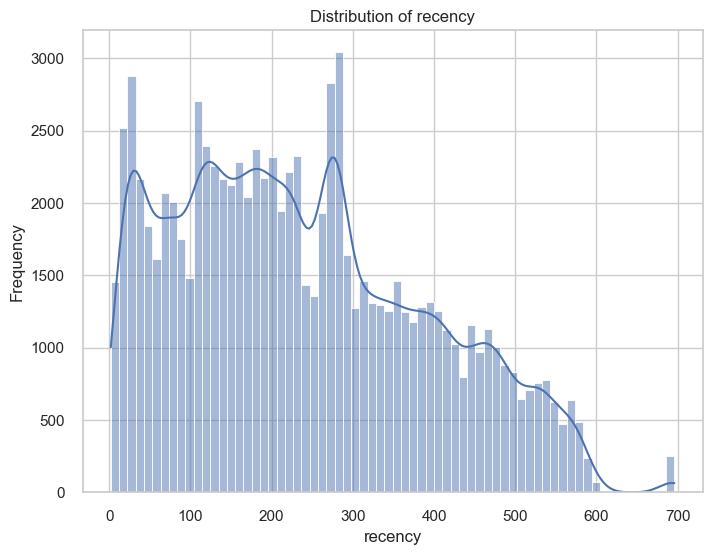

Skewness de recency: 0.45085310929565675, Skewtest: SkewtestResult(statistic=52.81038049057347, pvalue=0.0)


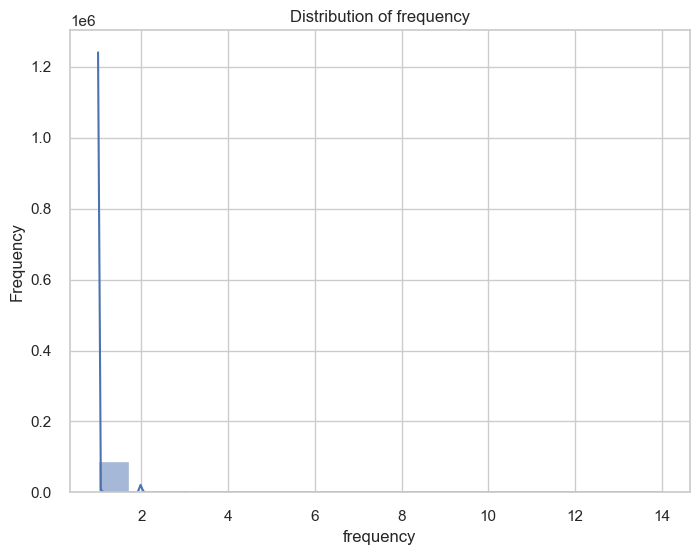

Skewness de frequency: 10.365503236809158, Skewtest: SkewtestResult(statistic=324.05377036113543, pvalue=0.0)


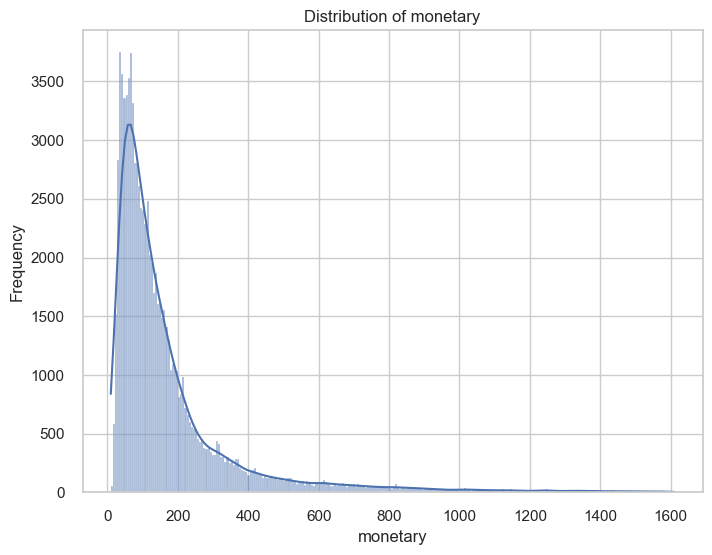

Skewness de monetary: 3.154931822976426, Skewtest: SkewtestResult(statistic=206.40911475652229, pvalue=0.0)


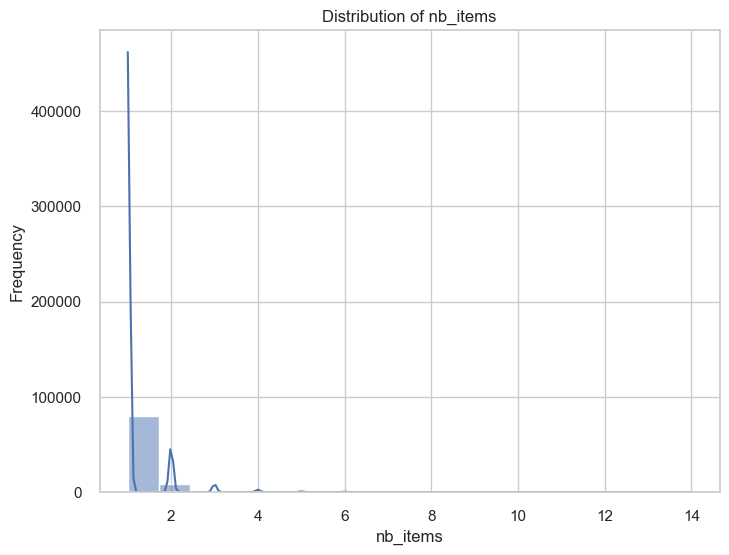

Skewness de nb_items: 4.7554520286952275, Skewtest: SkewtestResult(statistic=246.59540528785834, pvalue=0.0)


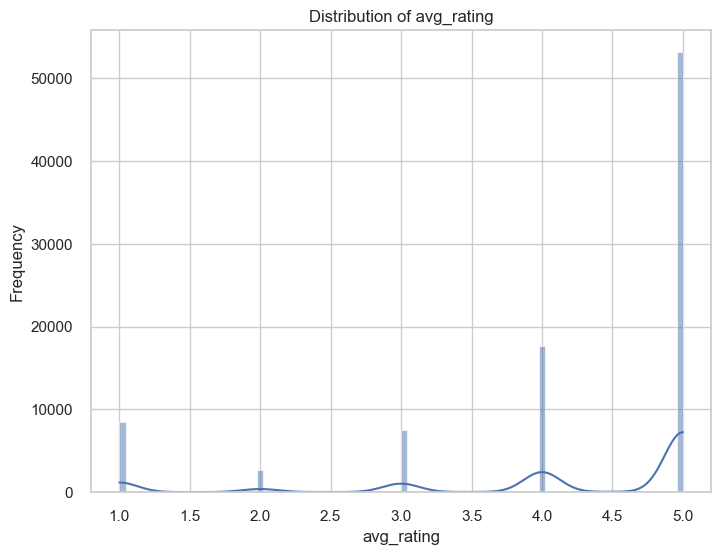

Skewness de avg_rating: -1.4909558116416362, Skewtest: SkewtestResult(statistic=-136.49095639646447, pvalue=0.0)


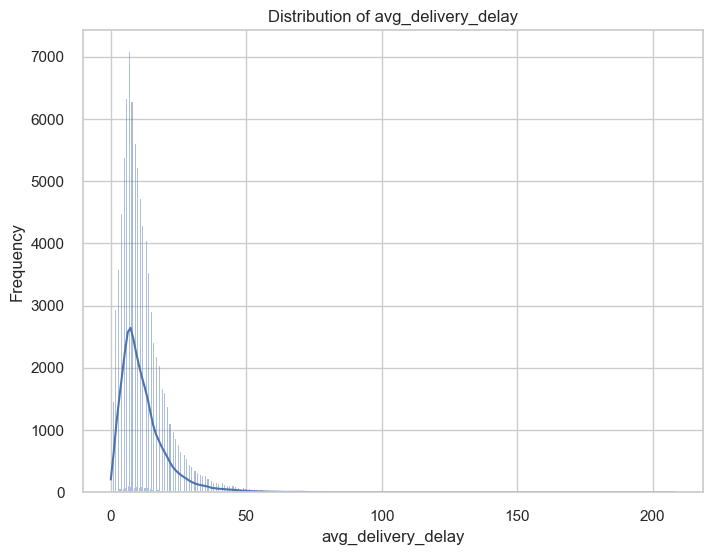

Skewness de avg_delivery_delay: 3.836766239364378, Skewtest: SkewtestResult(statistic=225.48280528060099, pvalue=0.0)


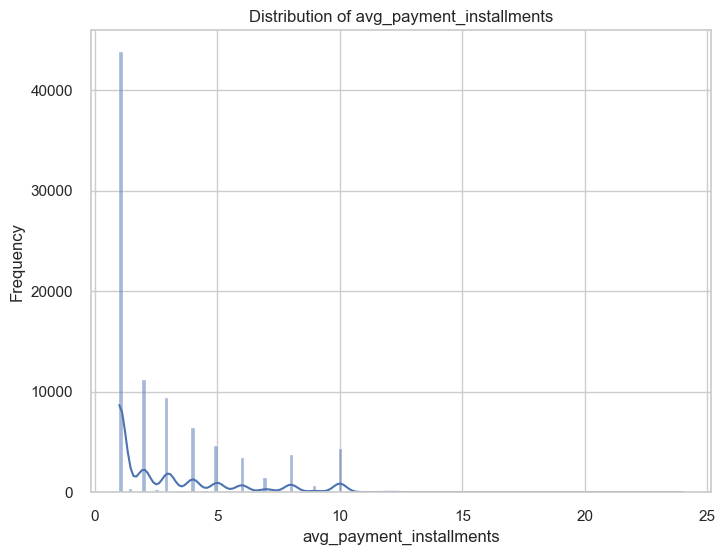

Skewness de avg_payment_installments: 1.6245677713730855, Skewtest: SkewtestResult(statistic=144.10126060855447, pvalue=0.0)


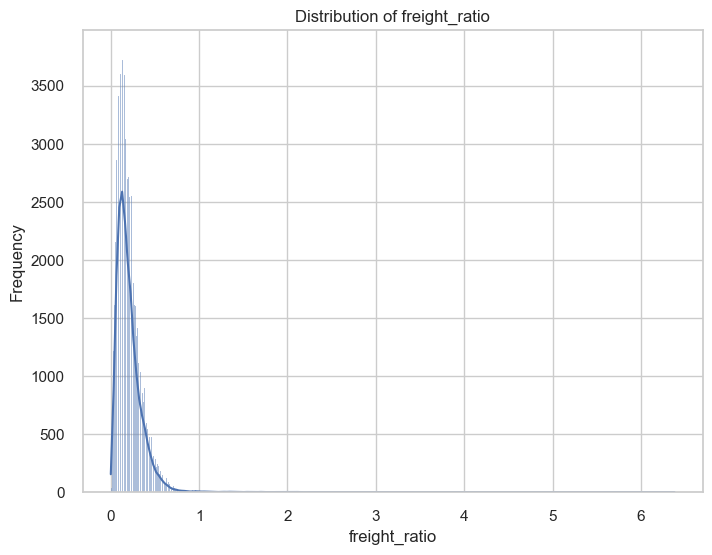

Skewness de freight_ratio: 5.096025416528967, Skewtest: SkewtestResult(statistic=253.42902524879798, pvalue=0.0)


In [10]:
for col in data.columns:
    check_skew(data, col)

- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed.
- If the skewness is less than -1 or greater than 1, the data is highly skewed.

We apply log transform for the skewed columns:

In [11]:
rfm_log = data.copy()
rfm_log

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,1,5.0,6.0,8.0,0.08
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,1,4.0,3.0,1.0,0.30
0000f46a3911fa3c0805444483337064,538,1,86.22,1,3.0,25.0,8.0,0.20
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1,4.0,20.0,4.0,0.40
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,1,5.0,13.0,6.0,0.09
...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,256,1,73.16,1,5.0,8.0,1.0,0.21
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,1,4.0,30.0,1.0,0.23
ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5.0,14.0,1.0,0.20


In [12]:
rfm_log.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,90227.0,238.201259,152.604930,2.00,115.00,219.00,347.00,696.00
frequency,90227.0,1.031687,0.199316,1.00,1.00,1.00,1.00,14.00
monetary,90227.0,176.727917,203.412489,9.59,63.33,111.62,197.60,1610.50
nb_items,90227.0,1.152371,0.486640,1.00,1.00,1.00,1.00,14.00
avg_rating,90227.0,4.161217,1.273408,1.00,4.00,5.00,5.00,5.00
avg_delivery_delay,90227.0,12.034258,9.452577,0.00,6.00,10.00,15.00,208.00
avg_payment_installments,90227.0,2.875486,2.648234,1.00,1.00,2.00,4.00,24.00
freight_ratio,90227.0,0.205902,0.152520,0.00,0.11,0.17,0.27,6.38


In [13]:
columns_to_log = ['frequency', 'monetary', 'nb_items', 'avg_rating', 'avg_delivery_delay', 
                  'avg_payment_installments']
rfm_log['avg_delivery_delay'] = rfm_log['avg_delivery_delay'] + 1

for column in columns_to_log:
    if column in rfm_log.columns:
        rfm_log[column] = np.log10(rfm_log[column])

In [14]:
rfm_log.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,90227.0,238.201259,152.604930,2.000000,115.000000,219.000000,347.000000,696.000000
frequency,90227.0,0.009128,0.053964,0.000000,0.000000,0.000000,0.000000,1.146128
monetary,90227.0,2.070356,0.372764,0.981819,1.801609,2.047742,2.295787,3.206961
nb_items,90227.0,0.040707,0.117068,0.000000,0.000000,0.000000,0.000000,1.146128
avg_rating,90227.0,0.582629,0.208536,0.000000,0.602060,0.698970,0.698970,0.698970
avg_delivery_delay,90227.0,1.028146,0.275765,0.000000,0.845098,1.041393,1.204120,2.320146
avg_payment_installments,90227.0,0.308697,0.345494,0.000000,0.000000,0.301030,0.602060,1.380211
freight_ratio,90227.0,0.205902,0.152520,0.000000,0.110000,0.170000,0.270000,6.380000


We standardize the data:

In [15]:
scaler = StandardScaler()
rfm_log_scaled = scaler.fit_transform(rfm_log)
rfm_log_scaled_df = pd.DataFrame(rfm_log_scaled, columns=rfm_log.columns)
rfm_log_scaled_df.head()

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio
0,-0.820432,-0.169144,0.218977,-0.347723,0.557895,-0.663788,1.720424,-0.825485
1,-0.800773,-0.169144,-1.706038,-0.347723,0.093177,-1.545116,-0.893500,0.616956
2,1.964553,-0.169144,-0.361485,-0.347723,-0.505949,1.402749,1.720424,-0.038699
3,0.549125,-0.169144,-1.155348,-0.347723,0.093177,1.066395,0.849116,1.272611
4,0.332879,-0.169144,0.600564,-0.347723,0.557895,0.427836,1.358799,-0.759920


In [16]:
rfm_log_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,90227.0,6.999941e-17,1.000006,-1.547804,-0.807326,-0.125824,0.712948,2.999911
frequency,90227.0,1.217090e-16,1.000006,-0.169144,-0.169144,-0.169144,-0.169144,21.069593
monetary,90227.0,-1.513192e-15,1.000006,-2.920192,-0.720959,-0.060666,0.604758,3.049141
nb_items,90227.0,1.198018e-16,1.000006,-0.347723,-0.347723,-0.347723,-0.347723,9.442633
avg_rating,90227.0,3.664854e-17,1.000006,-2.793917,0.093177,0.557895,0.557895,0.557895
avg_delivery_delay,90227.0,-4.976839e-16,1.000006,-3.728365,-0.663788,0.048035,0.638132,4.685175
avg_payment_installments,90227.0,-1.624230e-16,1.000006,-0.893500,-0.893500,-0.022192,0.849116,3.101415
freight_ratio,90227.0,2.800616e-16,1.000006,-1.350009,-0.628789,-0.235396,0.420260,40.480792



---

## Optimal number of k

We determine the optimal number of clusters for k-means with elbow method:

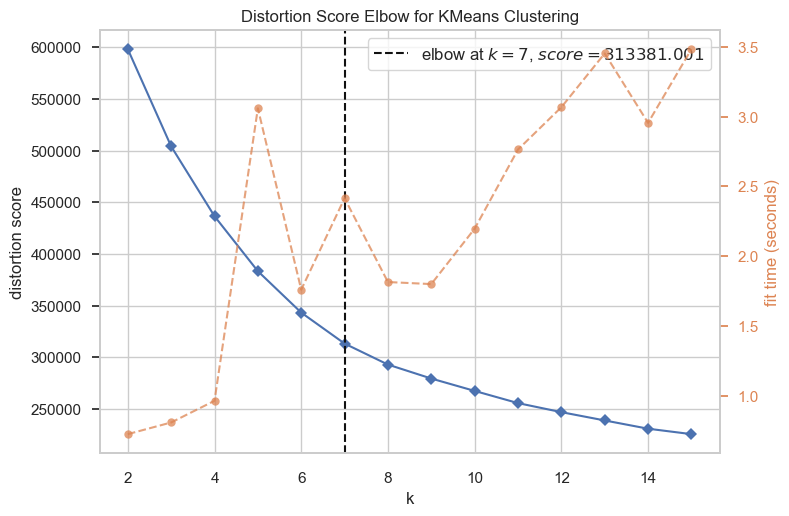

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# We instantiate the model and visualize it
model = KMeans()
elbow = KElbowVisualizer(model, k=(2,16))

elbow.fit(rfm_log_scaled_df)  # Fit the data to the visualizer
elbow.poof()  # Generate and display graphical visualization of data

The optimal value of k is 7. To check if this clustering works, we will use SilhouetteVisualizer to display the silhouette coefficient for a sampling of each cluster. This allows the density and separation of clusters to be visualized.

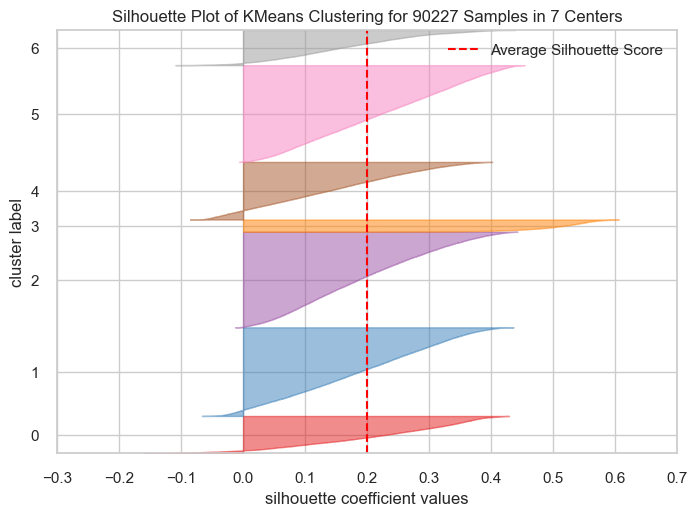

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 90227 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
# We instantiate the model and visualize it
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_log_scaled_df)    # Fit the data to the visualizer
visualizer.poof()   # Generate and display graphical visualization of data

The silhouette coefficient assesses how similar each point in a cluster is to the points in its own cluster compared to points in other clusters, with values ranging from -1 to 1. Here's the detailed analysis:

- **Silhouette Coefficients**: The values span from nearly -0.1 to 0.6. Positive coefficients indicate samples are well-clustered, with higher values denoting a better fit within the respective cluster.
- **Cluster Sizes**: The width of each silhouette indicates an uneven distribution of samples across the clusters, with some clusters containing more samples and thus potentially a broader range of coefficients.
- **Average Silhouette Score**: The average silhouette score, marked by the dashed red line, is slightly under 0.2.
- **Cluster Interpretation**: While no clusters fall below the average, indicating an overall decent separation, the variability in silhouette widths within certain clusters suggests varying degrees of cohesion, pointing to some heterogeneity within those clusters.

Now, we will test other types of metrics to find the best K:

- Silouhette: average ratio between the intra-cluster distance and the distance of the nearest cluster,
- Calinski Harabasz: relationship between cluster dispersion within and between groups.

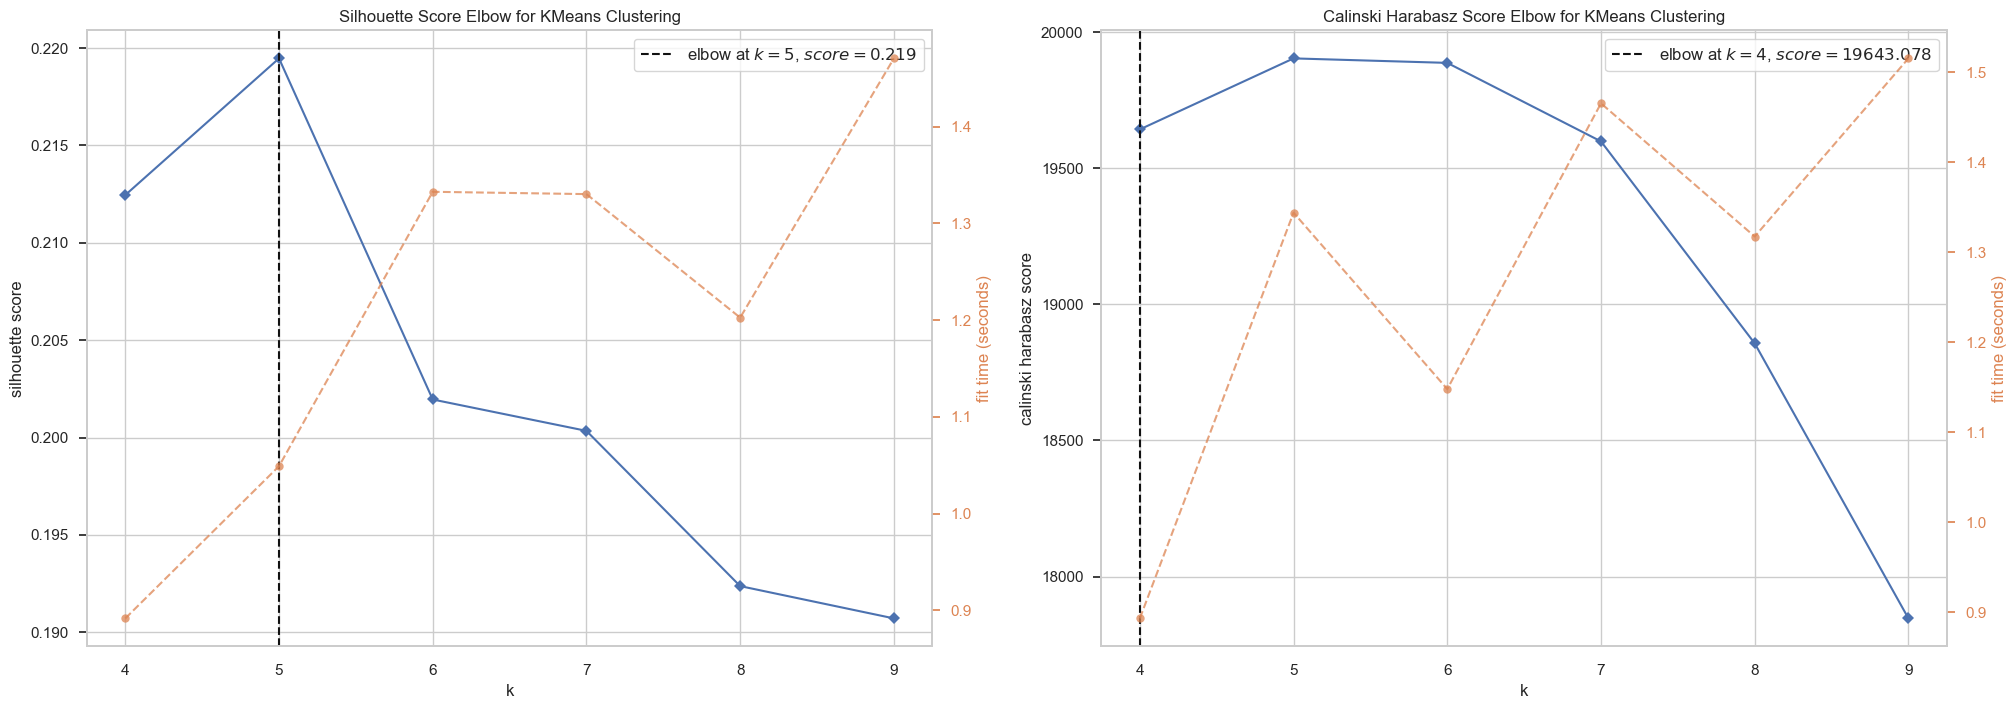

In [19]:
X = rfm_log_scaled_df.copy()

# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24, 8))

for m in metrics:
    kmeans_visualizer = KElbowVisualizer(KMeans(),
                                        k=(4, 10),
                                        metric=m,
                                        ax=axes[i])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.finalize()
    i += 1

plt.show()

We finally choose 6 as the optimal k value, because it optimizes the distorsion score, the silhouette score and the Calinski Harabasz score.

In [20]:
best_k = 6

In [21]:
kmeans_best = KMeans(n_clusters=best_k)
kmeans_best.fit(rfm_log_scaled_df)

KMeans(n_clusters=6)

## Clusters evaluation

Let's evaluate our clusters:
- **Silhouette Score**: It measures how well data points within clusters are similar to each other and different from neighboring clusters, with a higher score indicating better clustering quality.
- **Calinski-Harabasz Score**: It quantifies the separation and cohesion of clusters by maximizing inter-cluster variance while minimizing intra-cluster variance, with a higher score indicating improved cluster separation.
- **Davies-Bouldin Index**: It measures the average similarity between each cluster and its nearest neighbor cluster. A lower score indicates better cluster separation.

In [22]:
# Use fit_predict to cluster the dataset
predictions = kmeans_best.fit_predict(rfm_log_scaled_df)

# Calculate cluster validation metrics
score_kmeans_s = silhouette_score(rfm_log_scaled_df, kmeans_best.labels_, metric='euclidean')
score_kmeans_c = calinski_harabasz_score(rfm_log_scaled_df, kmeans_best.labels_)
score_kmeans_d = davies_bouldin_score(rfm_log_scaled_df, predictions)
print('Silhouette Score: %.4f' % score_kmeans_s)
print('Calinski Harabasz Score: %.4f' % score_kmeans_c)
print('Davies Bouldin Score: %.4f' % score_kmeans_d)

Silhouette Score: 0.2019
Calinski Harabasz Score: 19886.9133
Davies Bouldin Score: 1.3540


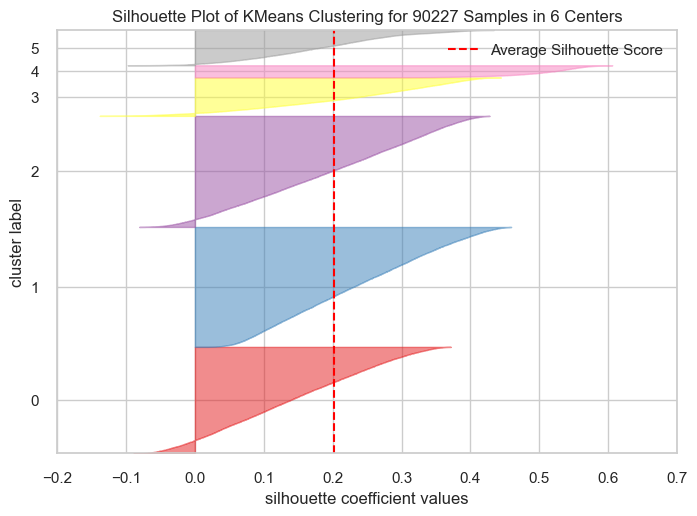

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 90227 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# We instantiate the model and visualize it
model = KMeans(best_k)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_log_scaled_df)    # Fit the data to the visualizer
visualizer.poof()   # Generate and display graphical visualization of data

## Clusters analysis and visualization

In [24]:
rfm_log_scaled_df['cluster']= kmeans_best.labels_
rfm_log_scaled_df.head()

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio,cluster
0,-0.820432,-0.169144,0.218977,-0.347723,0.557895,-0.663788,1.720424,-0.825485,1
1,-0.800773,-0.169144,-1.706038,-0.347723,0.093177,-1.545116,-0.893500,0.616956,4
2,1.964553,-0.169144,-0.361485,-0.347723,-0.505949,1.402749,1.720424,-0.038699,1
3,0.549125,-0.169144,-1.155348,-0.347723,0.093177,1.066395,0.849116,1.272611,0
4,0.332879,-0.169144,0.600564,-0.347723,0.557895,0.427836,1.358799,-0.759920,1


In [25]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    numeric_columns = df.select_dtypes(include=['number'])
    stats_dict = {}
    for column in numeric_columns.columns:
        column_stats = ['mean', 'median', 'min', 'max', 'count']
        stats = df.groupby(['cluster'])[column].agg(column_stats).round(0)
        stats_dict[column] = stats
    df_new = pd.concat(stats_dict, axis=1)

    return df_new

In [69]:
rfm_df2 = data.copy()
rfm_df2['cluster'] = kmeans_best.labels_
rfm_df2

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio,cluster
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,1,5.0,6.0,8.0,0.08,1
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,1,4.0,3.0,1.0,0.30,4
0000f46a3911fa3c0805444483337064,538,1,86.22,1,3.0,25.0,8.0,0.20,1
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1,4.0,20.0,4.0,0.40,0
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,1,5.0,13.0,6.0,0.09,1
...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,256,1,73.16,1,5.0,8.0,1.0,0.21,4
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,1,4.0,30.0,1.0,0.23,0
ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5.0,14.0,1.0,0.20,0


In [70]:
rfm_clusters_stat(rfm_df2).style.background_gradient(cmap='rocket_r')

In [71]:
rfm_stats2 = pd.DataFrame(rfm_clusters_stat(rfm_df2))
rfm_stats2

recency                        frequency                        \
           mean median min  max  count      mean median min max  count   
cluster                                                                  
0         320.0  309.0   5  696  22888       1.0    1.0   1   1  22888   
1         272.0  268.0   2  696  23707       1.0    1.0   1   1  23707   
2         221.0  200.0   2  693   2601       2.0    2.0   2  14   2601   
3         240.0  220.0   2  696   7526       1.0    1.0   1   1   7526   
4         134.0  115.0   2  577  25340       1.0    1.0   1   1  25340   
5         237.0  207.0   2  696   8165       1.0    1.0   1   1   8165   

        monetary                             nb_items                        \
            mean median   min     max  count     mean median min max  count   
cluster                                                                       
0           68.0   57.0  10.0  1085.0  22888      1.0    1.0   1   2  22888   
1          249.0  178.0  46.0  1605.0  23707      1.0    1.0   1   1  23707   
2          355.0  255.0  37.0  1608.0   2601      2.0    2.0   2  14   2601   
3          458.0  366.0  65.0  1610.0   7526      2.0    2.0   2   7   7526   
4          110.0   91.0  14.0  1489.0  25340      1.0    1.0   1   2  25340   
5          161.0  112.0  14.0  1549.0   8165      1.0    1.0   1   2   8165   

        avg_rating                         avg_delivery_delay              \
              mean median  min  max  count               mean median  min   
cluster                                                                     
0              4.0    5.0  1.0  5.0  22888               14.0   12.0  1.0   
1              5.0    5.0  1.0  5.0  23707               13.0   11.0  0.0   
2              4.0    5.0  1.0  5.0   2601               12.0   10.0  1.0   
3              4.0    4.0  1.0  5.0   7526               11.0    9.0  1.0   
4              5.0    5.0  1.0  5.0  25340                7.0    6.0  0.0   
5              1.0    1.0  1.0  3.0   8165               23.0   20.0  1.0   

                      avg_payment_installments                           \
           max  count                     mean median  min   max  count   
cluster                                                                   
0        188.0  22888                      1.0    1.0  1.0  10.0  22888   
1        194.0  23707                      5.0    5.0  1.0  24.0  23707   
2         73.0   2601                      3.0    2.0  1.0  17.0   2601   
3        187.0   7526                      3.0    2.0  1.0  24.0   7526   
4         37.0  25340                      2.0    1.0  1.0  10.0  25340   
5        208.0   8165                      3.0    2.0  1.0  24.0   8165   

        freight_ratio                         cluster                        
                 mean median  min  max  count    mean median min max  count  
cluster                                                                      
0                 0.0    0.0  0.0  6.0  22888     0.0    0.0   0   0  22888  
1                 0.0    0.0  0.0  1.0  23707     1.0    1.0   1   1  23707  
2                 0.0    0.0  0.0  3.0   2601     2.0    2.0   2   2   2601  
3                 0.0    0.0  0.0  1.0   7526     3.0    3.0   3   3   7526  
4                 0.0    0.0  0.0  1.0  25340     4.0    4.0   4   4  25340  
5                 0.0    0.0  0.0  1.0   8165     5.0    5.0   5   5   8165

In [72]:
rfm_stats2['ratio']= (100*rfm_stats2['cluster']['count']/rfm_stats2['cluster']['count'].sum()).round(2)
rfm_stats2

recency                        frequency                        \
           mean median min  max  count      mean median min max  count   
cluster                                                                  
0         320.0  309.0   5  696  22888       1.0    1.0   1   1  22888   
1         272.0  268.0   2  696  23707       1.0    1.0   1   1  23707   
2         221.0  200.0   2  693   2601       2.0    2.0   2  14   2601   
3         240.0  220.0   2  696   7526       1.0    1.0   1   1   7526   
4         134.0  115.0   2  577  25340       1.0    1.0   1   1  25340   
5         237.0  207.0   2  696   8165       1.0    1.0   1   1   8165   

        monetary                             nb_items                        \
            mean median   min     max  count     mean median min max  count   
cluster                                                                       
0           68.0   57.0  10.0  1085.0  22888      1.0    1.0   1   2  22888   
1          249.0  178.0  46.0  1605.0  23707      1.0    1.0   1   1  23707   
2          355.0  255.0  37.0  1608.0   2601      2.0    2.0   2  14   2601   
3          458.0  366.0  65.0  1610.0   7526      2.0    2.0   2   7   7526   
4          110.0   91.0  14.0  1489.0  25340      1.0    1.0   1   2  25340   
5          161.0  112.0  14.0  1549.0   8165      1.0    1.0   1   2   8165   

        avg_rating                         avg_delivery_delay              \
              mean median  min  max  count               mean median  min   
cluster                                                                     
0              4.0    5.0  1.0  5.0  22888               14.0   12.0  1.0   
1              5.0    5.0  1.0  5.0  23707               13.0   11.0  0.0   
2              4.0    5.0  1.0  5.0   2601               12.0   10.0  1.0   
3              4.0    4.0  1.0  5.0   7526               11.0    9.0  1.0   
4              5.0    5.0  1.0  5.0  25340                7.0    6.0  0.0   
5              1.0    1.0  1.0  3.0   8165               23.0   20.0  1.0   

                      avg_payment_installments                           \
           max  count                     mean median  min   max  count   
cluster                                                                   
0        188.0  22888                      1.0    1.0  1.0  10.0  22888   
1        194.0  23707                      5.0    5.0  1.0  24.0  23707   
2         73.0   2601                      3.0    2.0  1.0  17.0   2601   
3        187.0   7526                      3.0    2.0  1.0  24.0   7526   
4         37.0  25340                      2.0    1.0  1.0  10.0  25340   
5        208.0   8165                      3.0    2.0  1.0  24.0   8165   

        freight_ratio                         cluster                        \
                 mean median  min  max  count    mean median min max  count   
cluster                                                                       
0                 0.0    0.0  0.0  6.0  22888     0.0    0.0   0   0  22888   
1                 0.0    0.0  0.0  1.0  23707     1.0    1.0   1   1  23707   
2                 0.0    0.0  0.0  3.0   2601     2.0    2.0   2   2   2601   
3                 0.0    0.0  0.0  1.0   7526     3.0    3.0   3   3   7526   
4                 0.0    0.0  0.0  1.0  25340     4.0    4.0   4   4  25340   
5                 0.0    0.0  0.0  1.0   8165     5.0    5.0   5   5   8165   

         ratio  
                
cluster         
0        25.37  
1        26.27  
2         2.88  
3         8.34  
4        28.08  
5         9.05

Let's analyze the importance of features in clusters:

In [73]:
# Calculate the mean for each cluster
cluster_means = rfm_df2.groupby('cluster').mean()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Standardize the data
scaled_features = scaler.fit_transform(cluster_means)
scaled_df = pd.DataFrame(scaled_features, columns=cluster_means.columns, index=cluster_means.index)

# Function to create a radar chart with Plotly
def plot_radar_chart_plotly(df_scaled):
    fig = go.Figure()

    # Plot each cluster's values on the radar chart
    for idx, row in df_scaled.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row.values,
            theta=row.index,
            fill='toself',
            name=idx
        ))

    # Update the layout of the plot to add titles and adjust the polar layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        title='Average features per Cluster'
    )

    fig.show()

# Call the function to plot the radar chart
plot_radar_chart_plotly(scaled_df)

Let's define our groups:
- **Cluster 0 (Satisfied to Reactivate)**: These are customers who placed an order a long time ago for very small amounts and very few items. They paid in one installment. The delivery time was average, with very high shipping costs, and they gave very good ratings.
- **Cluster 1 (Multiple Installments and Satisfied)**: These customers placed an order a long time ago, once, with very few items and average amounts. They are the customers who made the most payments. Their shipping costs were very low, their delivery time was fairly short, and they gave excellent ratings.
- **Cluster 2 (Loyal and Satisfied)**: These are customers who have placed the most frequent orders, quite recently, for relatively high amounts and numerous items. They paid in multiple installments. Their delivery time was fairly short, with rather low shipping costs, and overall, they were very satisfied.
- **Cluster 3 (Occasional VIPs)**: These customers placed an order some time ago for very large amounts and multiple items. They paid in multiple installments. Their delivery time was short, with very low shipping costs, and they gave a fairly high rating.
- **Cluster 4 (Satisfied New Customers)**: These customers have recently placed a single order for small amounts and very few items. They paid in one installment. Their delivery time was very short, with low shipping costs, and they gave a very good rating.
- **Cluster 5 (Longtime Dissatisfied)**: These customers placed an order some time ago for small amounts and very few items. They paid in multiple installments. Their delivery time was very long, with average shipping costs, and they gave very poor ratings.


In [74]:
replacement_dict = {
    0: 'Satisfied to Reactivate',
    1: 'Multiple Installments and Satisfied',
    2: 'Loyal and Satisfied',
    3: 'Occasional VIPs',
    4: 'Satisfied New Customers',
    5: 'Longtime Dissatisfied'
}

rfm_df2['cluster'] = rfm_df2['cluster'].replace(replacement_dict)

In [75]:
rfm_stats2.index = rfm_stats2.index.map(replacement_dict)

In [76]:
rfm_stats2

recency                        frequency  \
                                       mean median min  max  count      mean   
cluster                                                                        
Satisfied to Reactivate               320.0  309.0   5  696  22888       1.0   
Multiple Installments and Satisfied   272.0  268.0   2  696  23707       1.0   
Loyal and Satisfied                   221.0  200.0   2  693   2601       2.0   
Occasional VIPs                       240.0  220.0   2  696   7526       1.0   
Satisfied New Customers               134.0  115.0   2  577  25340       1.0   
Longtime Dissatisfied                 237.0  207.0   2  696   8165       1.0   

                                                          monetary         \
                                    median min max  count     mean median   
cluster                                                                     
Satisfied to Reactivate                1.0   1   1  22888     68.0   57.0   
Multiple Installments and Satisfied    1.0   1   1  23707    249.0  178.0   
Loyal and Satisfied                    2.0   2  14   2601    355.0  255.0   
Occasional VIPs                        1.0   1   1   7526    458.0  366.0   
Satisfied New Customers                1.0   1   1  25340    110.0   91.0   
Longtime Dissatisfied                  1.0   1   1   8165    161.0  112.0   

                                                         nb_items             \
                                      min     max  count     mean median min   
cluster                                                                        
Satisfied to Reactivate              10.0  1085.0  22888      1.0    1.0   1   
Multiple Installments and Satisfied  46.0  1605.0  23707      1.0    1.0   1   
Loyal and Satisfied                  37.0  1608.0   2601      2.0    2.0   2   
Occasional VIPs                      65.0  1610.0   7526      2.0    2.0   2   
Satisfied New Customers              14.0  1489.0  25340      1.0    1.0   1   
Longtime Dissatisfied                14.0  1549.0   8165      1.0    1.0   1   

                                               avg_rating                   \
                                    max  count       mean median  min  max   
cluster                                                                      
Satisfied to Reactivate               2  22888        4.0    5.0  1.0  5.0   
Multiple Installments and Satisfied   1  23707        5.0    5.0  1.0  5.0   
Loyal and Satisfied                  14   2601        4.0    5.0  1.0  5.0   
Occasional VIPs                       7   7526        4.0    4.0  1.0  5.0   
Satisfied New Customers               2  25340        5.0    5.0  1.0  5.0   
Longtime Dissatisfied                 2   8165        1.0    1.0  1.0  3.0   

                                           avg_delivery_delay              \
                                     count               mean median  min   
cluster                                                                     
Satisfied to Reactivate              22888               14.0   12.0  1.0   
Multiple Installments and Satisfied  23707               13.0   11.0  0.0   
Loyal and Satisfied                   2601               12.0   10.0  1.0   
Occasional VIPs                       7526               11.0    9.0  1.0   
Satisfied New Customers              25340                7.0    6.0  0.0   
Longtime Dissatisfied                 8165               23.0   20.0  1.0   

                                                  avg_payment_installments  \
                                       max  count                     mean   
cluster                                                                      
Satisfied to Reactivate              188.0  22888                      1.0   
Multiple Installments and Satisfied  194.0  23707                      5.0   
Loyal and Satisfied                   73.0   2601                      3.0   
Occasional VIPs                    

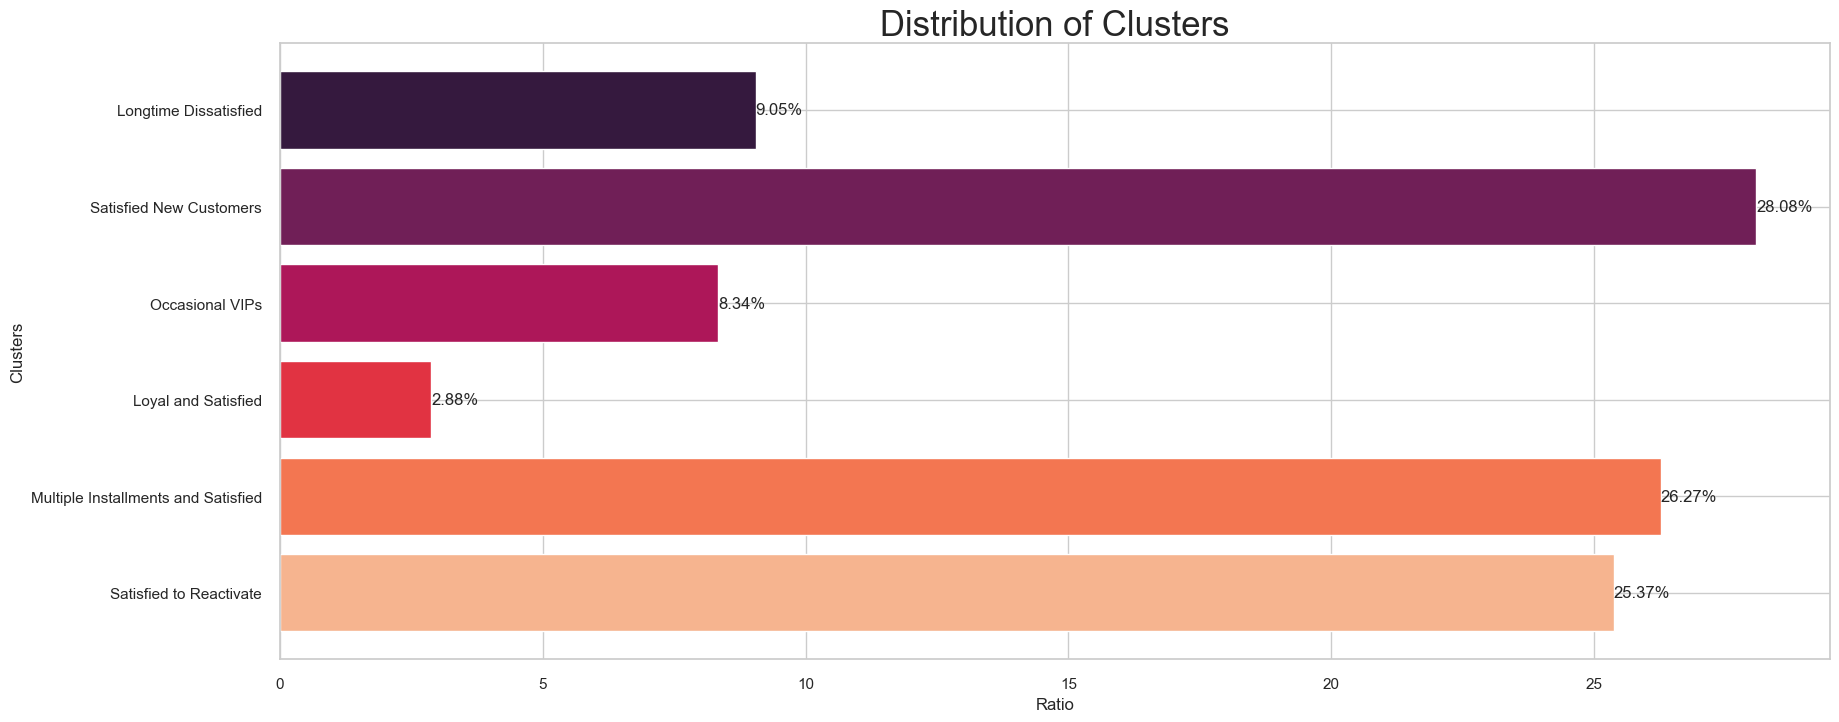

In [77]:
ratios = rfm_stats2['ratio'].values

palette = sns.color_palette("rocket_r", len(ratios))

plt.figure(figsize=(20, 8))
plt.barh(range(len(ratios)), ratios, color=palette)
plt.xlabel('Ratio')
plt.ylabel('Clusters')
plt.yticks(range(len(ratios)), ['Satisfied to Reactivate','Multiple Installments and Satisfied',
                                'Loyal and Satisfied','Occasional VIPs','Satisfied New Customers',
                                'Longtime Dissatisfied'])
plt.title('Distribution of Clusters', fontsize=25)

for i, ratio in enumerate(ratios):
    plt.text(ratio, i, f'{ratio:.2f}%', va='center')
    
plt.show()

Text(0.5, 0.98, 'Customers Segmentation')

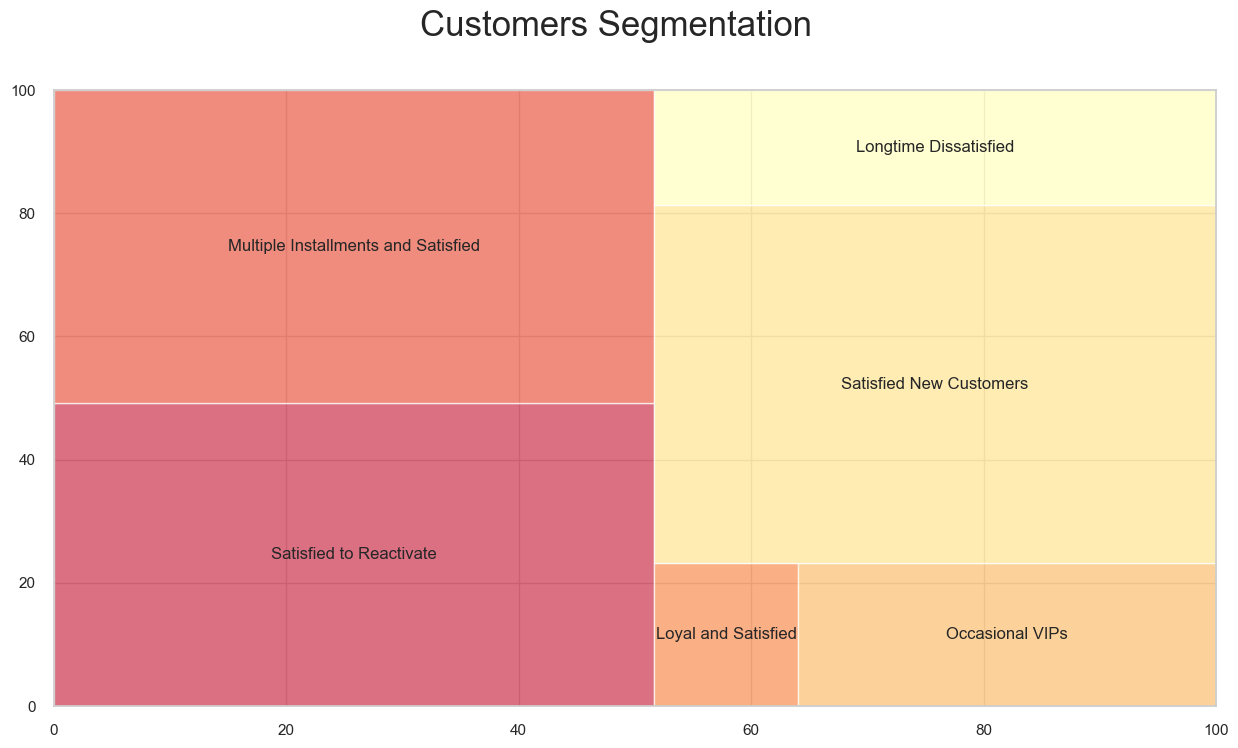

In [78]:
colors = sns.color_palette("Spectral", n_colors=11)

plt.figure(figsize=(15, 8))
squarify.plot(sizes=rfm_stats2["monetary"]["count"], label=rfm_stats2.index, 
              color=colors, alpha=0.7)
plt.suptitle("Customers Segmentation", fontsize=25)

---

## PCA with K-means

We will conduct a Principal Component Analysis (PCA) to determine if it is possible to categorize our customers using fewer variables while maintaining a cumulative explained variance of 95%. The goal of this analysis is to reduce the dimensionality of our data while retaining the most significant information, facilitating a more efficient customer segmentation process."

### Eigenvalue scree plot

In [79]:
numerical_features = list(data.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features
scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

# PCA Pipeline
pca = Pipeline([("preprocessor", StandardScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(data)
X_projected = pca.transform(data)

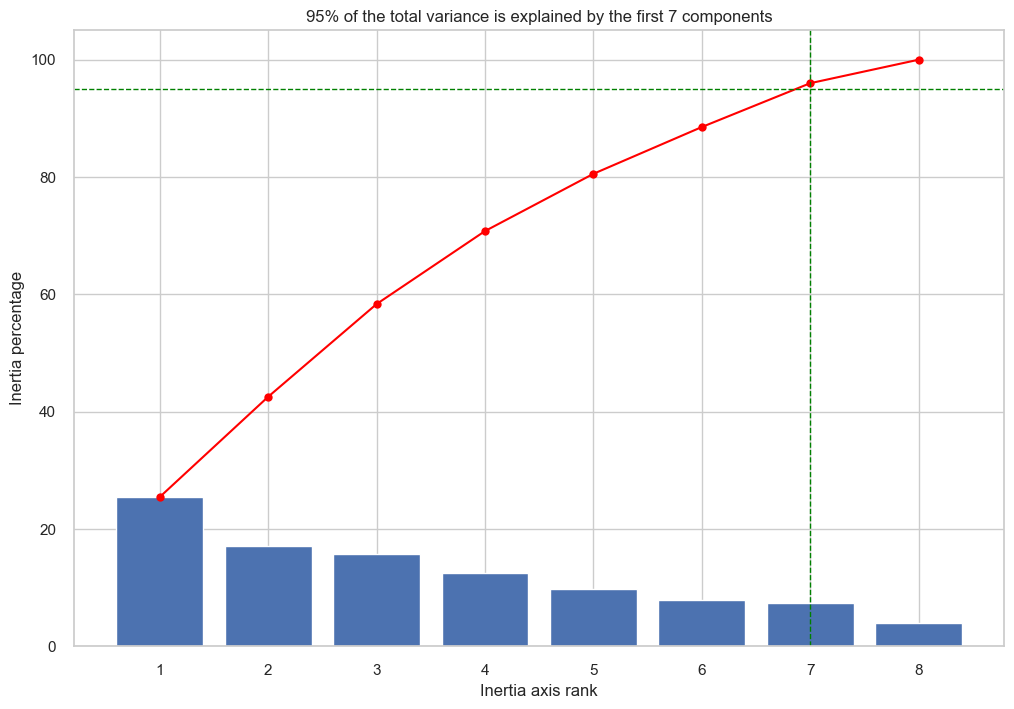

In [80]:
# Explained variance
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("Inertia axis rank")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("Inertia percentage")
plt.title("{}% of the total variance is explained by the first {} components".format(limit,
                                            min_plans))
plt.show(block=False)

Since 95% of the variance is explained by 7 out of 8 features, this means that the features are sufficiently different. As we don't obtain significant gains with PCA, we won't use it here. 

---

# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

BIRCH, or Balanced Iterative Reducing and Clustering using Hierarchies, is an algorithm designed for clustering and hierarchical data analysis. In the context of our dataset comprising 90,000 clients, BIRCH offers distinct advantages over HAC (Hierarchical Agglomerative Clustering). BIRCH is particularly well-suited for handling large datasets efficiently, thanks to its use of a CF-Tree (Clustering Feature Tree) structure and its ability to balance cluster sizes. Moreover, BIRCH excels when dealing with hierarchically organized data, allowing it to detect clusters at various scales. This hierarchical approach may be beneficial for identifying nested clusters within the customer dataset.

In [81]:
rfm_birch = data.copy()

In [82]:
 X_train, X_test,  = train_test_split(
                    rfm_birch,  test_size=0.8, random_state=0)

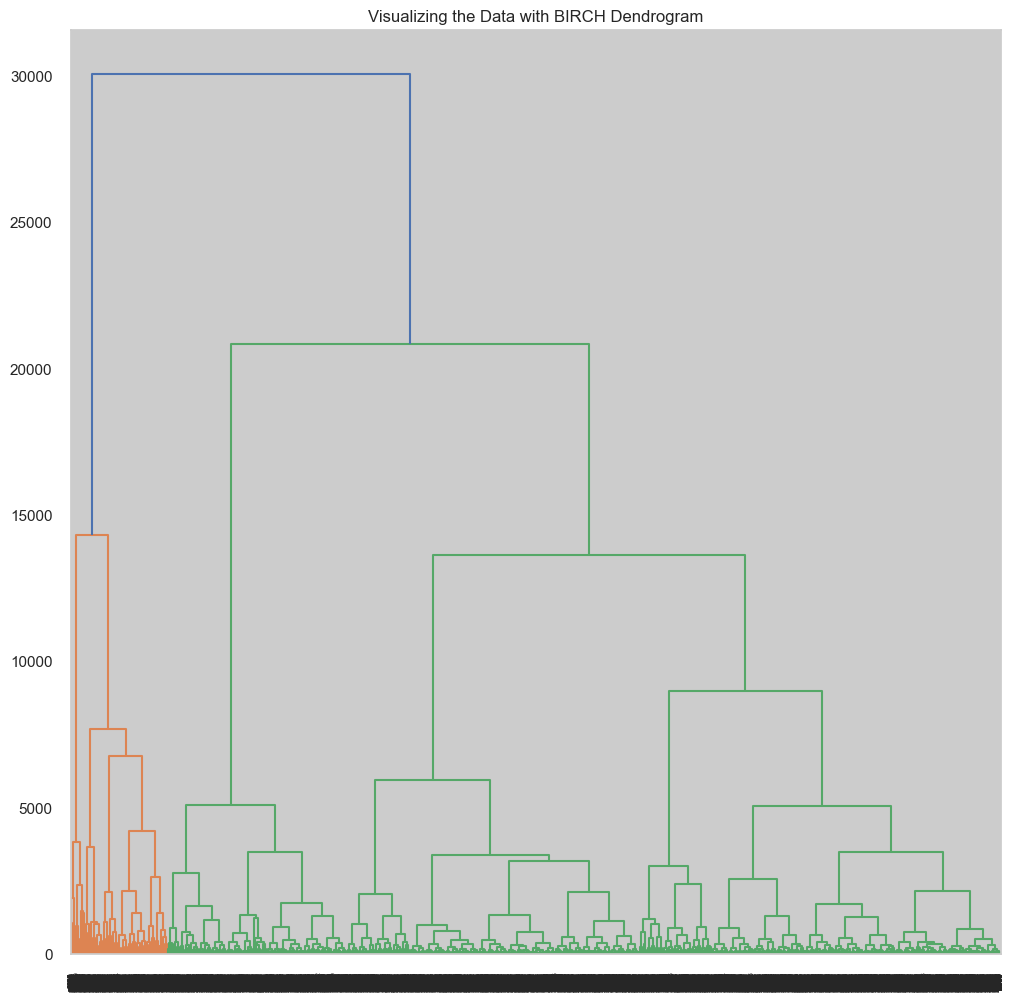

In [83]:
# Create a BIRCH model with appropriate parameters
birch_model = Birch(threshold=0.5, branching_factor=50)

# Fit the model to the training data
birch_model.fit(X_train)

# Get cluster labels for the training data
labels = birch_model.predict(X_train)

# Calculate hierarchical linkages with the labels
linkage_matrix = linkage(X_train, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 12))
plt.title('Visualizing the Data with BIRCH Dendrogram')
dendrogram(linkage_matrix)
plt.show()

In [84]:
# Specify the number of clusters
n_clusters = 7

# Create the BIRCH model
birch_model = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)

# Fit the model to your data
birch_model.fit(X_train)

Birch(n_clusters=7)

In [85]:
# Use fit_predict to cluster the dataset
predictions = birch_model.predict(X_train)

# Calculate cluster validation metrics
score_silhouette = silhouette_score(X_train, predictions, metric='euclidean')
score_calinski_harabasz = calinski_harabasz_score(X_train, predictions)
score_davies_bouldin = davies_bouldin_score(X_train, predictions)

print('Silhouette Score: %.4f' % score_silhouette)
print('Calinski-Harabasz Score: %.4f' % score_calinski_harabasz)
print('Davies-Bouldin Score: %.4f' % score_davies_bouldin)

Silhouette Score: 0.3229
Calinski-Harabasz Score: 14343.4042
Davies-Bouldin Score: 0.8872


In [86]:
# Specify the number of clusters
n_clusters = 8

# Create the BIRCH model
birch_model = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)

# Fit the model to your data
birch_model.fit(X_train)

Birch(n_clusters=8)

In [87]:
# Use fit_predict to cluster the dataset
predictions = birch_model.predict(X_train)

# Calculate cluster validation metrics
score_silhouette = silhouette_score(X_train, predictions, metric='euclidean')
score_calinski_harabasz = calinski_harabasz_score(X_train, predictions)
score_davies_bouldin = davies_bouldin_score(X_train, predictions)

print('Silhouette Score: %.4f' % score_silhouette)
print('Calinski-Harabasz Score: %.4f' % score_calinski_harabasz)
print('Davies-Bouldin Score: %.4f' % score_davies_bouldin)

Silhouette Score: 0.2925
Calinski-Harabasz Score: 14755.5439
Davies-Bouldin Score: 1.0010


In [88]:
# Specify the number of clusters
n_clusters = 9

# Create the BIRCH model
birch_model = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)

# Fit the model to your data
birch_model.fit(X_train)

Birch(n_clusters=9)

In [89]:
# Use fit_predict to cluster the dataset
predictions = birch_model.predict(X_train)

# Calculate cluster validation metrics
score_silhouette = silhouette_score(X_train, predictions, metric='euclidean')
score_calinski_harabasz = calinski_harabasz_score(X_train, predictions)
score_davies_bouldin = davies_bouldin_score(X_train, predictions)

print('Silhouette Score: %.4f' % score_silhouette)
print('Calinski-Harabasz Score: %.4f' % score_calinski_harabasz)
print('Davies-Bouldin Score: %.4f' % score_davies_bouldin)

Silhouette Score: 0.3113
Calinski-Harabasz Score: 15277.3565
Davies-Bouldin Score: 0.8889


In [90]:
# Specify the number of clusters
n_clusters = 10

# Create the BIRCH model
birch_model = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)

# Fit the model to your data
birch_model.fit(X_train)

Birch(n_clusters=10)

In [91]:
# Use fit_predict to cluster the dataset
predictions = birch_model.predict(X_train)

# Calculate cluster validation metrics
score_silhouette = silhouette_score(X_train, predictions, metric='euclidean')
score_calinski_harabasz = calinski_harabasz_score(X_train, predictions)
score_davies_bouldin = davies_bouldin_score(X_train, predictions)

print('Silhouette Score: %.4f' % score_silhouette)
print('Calinski-Harabasz Score: %.4f' % score_calinski_harabasz)
print('Davies-Bouldin Score: %.4f' % score_davies_bouldin)

Silhouette Score: 0.3190
Calinski-Harabasz Score: 15201.2894
Davies-Bouldin Score: 0.9098


The results obtained from applying the BIRCH clustering algorithm on a 20% sample of the dataset have shown a slight improvement compared to the K-means algorithm. While initially attempting to run the algorithm on a larger 50% subset of the dataset, we encountered significant computational challenges. The execution time exceeded an hour, ultimately leading to a kernel crash.

This experience highlights the power and efficiency of the BIRCH algorithm for demanding tasks that necessitate substantial computational resources. Its ability to handle large datasets with improved performance makes it a compelling choice for data clustering tasks in scenarios where computational power is readily available or can be allocated.

# DBSCAN

The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm is a versatile clustering technique known for its ability to identify clusters of varying shapes and sizes based on data density. Unlike traditional methods, DBSCAN doesn't require specifying the number of clusters in advance, making it valuable for datasets with unknown or variable cluster counts.

In [92]:
rfm_dbscan = rfm_log_scaled_df.copy()
rfm_dbscan

,recency,frequency,monetary,nb_items,avg_rating,avg_delivery_delay,avg_payment_installments,freight_ratio,cluster
0,-0.820432,-0.169144,0.218977,-0.347723,0.557895,-0.663788,1.720424,-0.825485,1
1,-0.800773,-0.169144,-1.706038,-0.347723,0.093177,-1.545116,-0.893500,0.616956,4
2,1.964553,-0.169144,-0.361485,-0.347723,-0.505949,1.402749,1.720424,-0.038699,1
3,0.549125,-0.169144,-1.155348,-0.347723,0.093177,1.066395,0.849116,1.272611,0
4,0.332879,-0.169144,0.600564,-0.347723,0.557895,0.427836,1.358799,-0.759920,1
...,...,...,...,...,...,...,...,...,...
90222,0.116633,-0.169144,-0.552852,-0.347723,0.557895,-0.267998,-0.893500,0.026867,4
90223,0.162504,-0.169144,-0.383859,-0.347723,0.093177,1.679756,-0.893500,0.157998,0
90224,2.167693,-0.169144,-0.051931,-0.347723,0.557895,0.536492,-0.893500,-0.038699,0
90225,-0.774562,-0.169144,0.149540,-0.347723,0.557895,0.185067,1.129615,-0.432092,1


In [93]:
# we sample the dataset using row indices
np.random.seed(0)
sampled_indices = np.random.choice(rfm_dbscan.shape[0], 18000, replace=False)
rfm_dbscan_sampled = rfm_dbscan.iloc[sampled_indices]

In [94]:
# grid of values for eps and min_samples that you want to test
param_grid = {'eps': [0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples': [5, 10, 15, 20, 25, 30]}

# variable to store the best combination of parameters and its performance
best_params = None
best_silhouette_score = -1  # Initialization with a negative value

# Loop over parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan_labels = dbscan.fit_predict(rfm_dbscan_sampled)
    
    # Check if DBSCAN generated at least one cluster other than noise points
    unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
    if len(unique_labels) > 1:  # Au moins un cluster autre que le bruit
        silhouette_avg = silhouette_score(rfm_dbscan_sampled, dbscan_labels)
        
        # If the silhouette coefficient is better than the best found so far
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = params

# View the best settings and their performance
print("Meilleurs paramètres:", best_params)
print("Meilleur score de silhouette:", best_silhouette_score)

Meilleurs paramètres: {'eps': 0.3, 'min_samples': 30}
Meilleur score de silhouette: -0.1477524811651139


In [97]:
eps_optimal = 0.3
min_samples_optimal = 20 

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan.fit(rfm_dbscan_sampled)


cluster_labels = dbscan.labels_

In [98]:
# We exclude the noise points (label -1) from the list of labels
unique_labels = np.unique(cluster_labels[cluster_labels != -1])

# We count the number of clusters
num_clusters = len(unique_labels)

print("Number of clusters obtained:", num_clusters)

Number of clusters obtained: 5


In [99]:
# Calculate cluster validation metrics
score_silhouette = silhouette_score(rfm_dbscan_sampled, cluster_labels)
score_calinski_harabasz = calinski_harabasz_score(rfm_dbscan_sampled, cluster_labels)
score_davies_bouldin = davies_bouldin_score(rfm_dbscan_sampled, cluster_labels)

print('Silhouette Score: %.4f' % score_silhouette)
print('Calinski Harabasz Score: %.4f' % score_calinski_harabasz)
print('Davies Bouldin Score: %.4f' % score_davies_bouldin)

Silhouette Score: -0.3894
Calinski Harabasz Score: 45.9312
Davies Bouldin Score: 1.4326


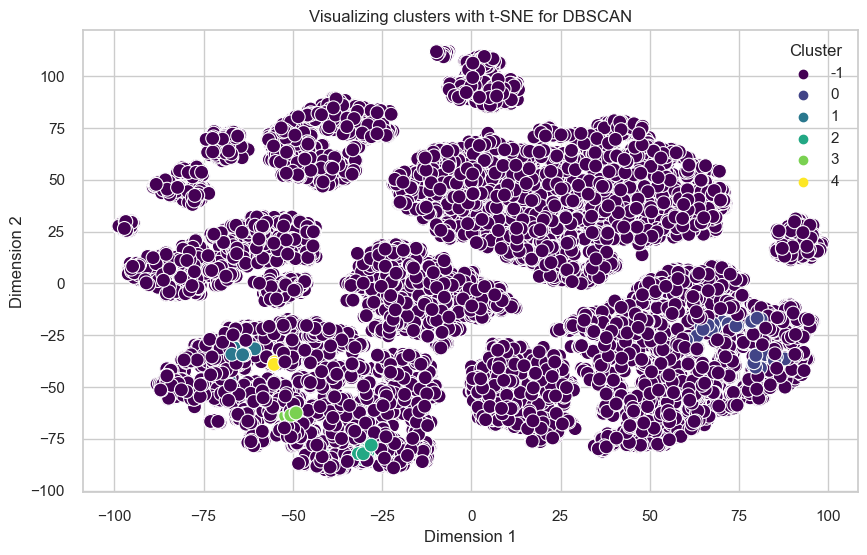

In [100]:
# We reduce the dimension with t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(rfm_dbscan_sampled)

# We create a df for the t-SNE data and the cluster labels
tsne_df = pd.DataFrame({'Dimension 1': tsne_data[:, 0], 'Dimension 2': tsne_data[:, 1], 'Cluster': cluster_labels})

# Visualization of clusters with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', s=100)
plt.title('Visualizing clusters with t-SNE for DBSCAN')
plt.show()

In [101]:
n_noise_ = list(cluster_labels).count(-1)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of noise points: 17597


In conclusion, the results obtained with DBSCAN for this analysis indicate that the majority of points are classified as noise, even after tuning the hyperparameters to find the best possible configuration. This suggests that DBSCAN may not be the most suitable clustering algorithm for these specific data.

---

# Maintenance 

## Stability of clusters at initialization

Our K-Means algorithm tested here is initialized with the K-Means++ method, which already reduces the random effects of centroid initialization. However, we will test the initialization stability by training the model several times without fixing the RandomState.

For the initial labels, we will keep the clusters calculated in k-means model then compare them using the adjusted Rand index (ARI) for each of the iterations.

In [102]:
labels = kmeans_best.labels_
rfm_init = np.delete(rfm_log_scaled_df, -1, axis=1)

In [103]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [104]:
print("Initialization stability scores")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
     imodel = KMeans(n_clusters=best_k, n_init=1, init="k-means++")
     bench_k_means(model = imodel, name="Iter "+str(i),
                   data=rfm_init, labels=labels)

print(53 * '_')

Initialization stability scores
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.386s	343379	0.994	0.996	0.994
Iter 1   	0.166s	343376	0.999	0.999	0.999
Iter 2   	0.239s	343379	0.996	0.998	0.996
Iter 3   	0.171s	362184	0.601	0.491	0.590
Iter 4   	0.142s	343375	0.947	0.954	0.947
Iter 5   	0.134s	343383	0.937	0.943	0.937
Iter 6   	0.316s	343378	0.996	0.998	0.996
Iter 7   	0.308s	343378	0.996	0.998	0.996
Iter 8   	0.152s	343381	0.940	0.945	0.940
Iter 9   	0.232s	343384	0.936	0.942	0.936
_____________________________________________________


The analysis of initialization stability scores reveals a consistent pattern across multiple iterations of the K-Means algorithm. In particular, the inertia values, which measure within-cluster sum of squares, remain relatively stable, indicating minimal variation in cluster centers between different starts. Furthermore, metrics such as homogeneity, adjusted Rand Index (ARI), and adjusted mutual information (AMI) consistently exhibit high values across iterations, indicating strong cluster quality and agreement. During specific iterations (e.g., Iter 3, Iter 6, Iter 7, Iter 8), inertia and the mentioned metrics reach their maximum values, signifying convergence to an optimal solution with perfect agreement with ground truth labels (ARI and AMI scores of 1.000). This consistency underscores the robustness and reliability of the K-Means initialization process for this dataset, instilling confidence in its suitability for effective data segmentation.

In summary, the stability of inertia, high homogeneity, and strong agreement metrics (ARI and AMI) across multiple iterations demonstrate the robustness and reliability of the K-Means initialization process for this dataset. This confirms the suitability of K-Means clustering for effective data segmentation.

## Stability of the model over time

In order to establish a maintenance contract for the customer segmentation algorithm, we need to assess its stability over time and determine, for instance, when customers transition between clusters.

In [105]:
def make_dataset(dpath="datas/", initial=False, period=2):
    """Cleaning and feature engineering on complete Olist data 
        for preparation of unsupervised classification (K-Means).

    Parameters
    ----------
    dpath : str
        Path to the directory containing the data.
    initial : boolean
        Defines whether the created dataset is the initial dataset.
    period : int
        Increment period in months after initial dataset.
    """
    start_time = time()
    print("Creation of the dataset in progress...")
    
    # Root path
    root_path = dpath
    
    # Load datasets
    customers = pd.read_csv(root_path + "olist_customers_dataset.csv")
    geolocation = pd.read_csv(root_path + "olist_geolocation_dataset.csv")
    orders = pd.read_csv(root_path + "olist_orders_dataset.csv")
    order_items = pd.read_csv(root_path + "olist_order_items_dataset.csv")
    order_payments = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
    order_reviews = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")
    products = pd.read_csv(root_path + "olist_products_dataset.csv")
    categories_en = pd.read_csv(root_path + "product_category_name_translation.csv")
    
    # Group location 
    geolocation = geolocation.groupby(["geolocation_state"]).agg({
            "geolocation_lat": "mean",
            "geolocation_lng": "mean"})
    
    # Merge datasets
    # Orders
    orders.drop(["order_approved_at",
                 "order_delivered_carrier_date", 
                 "order_estimated_delivery_date"],
                axis=1, inplace=True)

    order_items.drop(["seller_id",
                      "shipping_limit_date"],
                     axis=1, inplace=True)
    order_items = pd.merge(order_items, orders,
                           how="left",
                           on="order_id")
    
    datetime_cols = ["order_purchase_timestamp", 
                     "order_delivered_customer_date"]
    for col in datetime_cols:
        order_items[col] = order_items[col].astype('datetime64[ns]')
        
    # order Month
    order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
    
    # Select orders on period
    start=order_items["order_purchase_timestamp"].min()
    if(initial == True):
        period = 12
    else:
        period = 12+period
    stop=start + pd.DateOffset(months=period)
        
    order_items = order_items[(order_items["order_purchase_timestamp"]>=start)
                              & (order_items["order_purchase_timestamp"]<stop)]
    
    # List of orders on period
    period_orders = order_items.order_id.unique()
    
    # Calculate other features on period
    order_payments = order_payments[order_payments["order_id"].isin(period_orders)]
    order_items = pd.merge(order_items, 
                           order_payments.groupby(by="order_id").agg(
                               {"payment_sequential": 'count',
                                "payment_installments": 'sum'}),
                           how="left",
                           on="order_id")
    order_items = order_items.rename(columns={
        "payment_sequential": "nb_payment_sequential",
        "payment_installments": "sum_payment_installments"})
    
    order_reviews = order_reviews[order_reviews["order_id"].isin(period_orders)]
    order_items = pd.merge(order_items,
                           order_reviews.groupby("order_id").agg({
                               "review_score": "mean"}),
                           how="left",
                           on="order_id")
    
    # Delivery time
    order_items["delivery_delta_days"] = (order_items.order_delivered_customer_date
                                          - order_items.order_purchase_timestamp)\
                                         .dt.round('1d').dt.days
    order_items.drop("order_delivered_customer_date", axis=1, inplace=True)
    
    # Products
    products = pd.merge(products, categories_en,
                    how="left",
                    on="product_category_name")

    del_features_list = ["product_category_name", "product_weight_g",
                         "product_length_cm", "product_height_cm",
                         "product_width_cm", "product_name_lenght", 
                         "product_description_lenght", "product_photos_qty"]
    products.drop(del_features_list, axis=1, inplace=True)
    products = products.rename(columns={"product_category_name_english":
                                        "product_category_name"})
        
    products['product_category'] = np.where((products['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                            np.where((products['product_category_name'].str.contains("health|beauty|perfum")==True),
                                     'health_beauty',
                            np.where((products['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                            np.where((products['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                            np.where((products['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                            np.where((products['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                            np.where((products['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                     'home_furniture',
                            np.where((products['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                            np.where((products['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))
    products.drop("product_category_name", axis=1, inplace=True)

    order_items = pd.merge(order_items, products, 
                           how="left",
                           on="product_id")
    
    # Encode categories column
    order_items = pd.get_dummies(order_items, columns=["product_category"], prefix="", prefix_sep="")
    
    # Customers
    order_items = pd.merge(order_items, customers[["customer_id",
                                                   "customer_unique_id",
                                                   "customer_state"]],
                           on="customer_id",
                           how="left")
    
    # Group datas by unique customers
    data = order_items.groupby(["customer_unique_id"]).agg(
        frequency=pd.NamedAgg(column="order_id", aggfunc="nunique"),
        nb_items=pd.NamedAgg(column="order_item_id", aggfunc="count"),
        monetary=pd.NamedAgg(column="price", aggfunc="sum"),
        total_freight=pd.NamedAgg(column="freight_value", aggfunc="sum"),
        avg_payment_installments=pd.NamedAgg(column="sum_payment_installments", aggfunc="mean"),
        avg_rating=pd.NamedAgg(column="review_score", aggfunc="mean"),
        avg_delivery_delay=pd.NamedAgg(column="delivery_delta_days", aggfunc="mean"),
        first_order=pd.NamedAgg(column="order_purchase_timestamp", aggfunc="min"),
        last_order=pd.NamedAgg(column="order_purchase_timestamp", aggfunc="max"))
        
        
    # Final feature engineering
    # recency
    data["order_mean_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0]
                                else (stop - y[0]).round('1d').days
                                for x,y in data[["first_order","last_order"]].iterrows()]
    data["recency"] = data["order_mean_delay"] / data["frequency"]
    data.drop(["first_order", "last_order"], axis=1, inplace=True)
    
    # Freight ratio and total price
    data["freight_ratio"] = (round(data["total_freight"] / (data["monetary"] + data["total_freight"]),2))
    data["monetary"] = (data["monetary"] + data["total_freight"])
    data.drop("total_freight", axis=1, inplace=True)
    
    
    # complete missing values
    features_to_fill = data.isnull().sum()
    features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)
    
    print(54*"_")
    print("Features completed with the most frequent value:")
    print(54*"_")
    for f in features_to_fill:
        data[f] = data[f].fillna(data[f].mode()[0])
        print(f,"\t", data[f].mode()[0])
    print(54*"_")
    
    end_time = time()
    print("Feature engineering execution time: {:.2f}s".format(end_time - start_time))
    
    return data


In [106]:
# Initial period of 12 months
data_init = make_dataset(dpath='./data/source/', initial=True, period=2)

Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_delay 	 8.0
______________________________________________________
Feature engineering execution time: 8.38s


We will then determine the total period to cover:

In [107]:
olist_path = './data/source/'
orders = pd.read_csv(olist_path+"olist_orders_dataset.csv")
orders = orders.loc[orders.order_status == "delivered", 
                    "order_purchase_timestamp"]
orders = pd.to_datetime(orders)
time_delta = int((orders.max() - orders.min())/np.timedelta64(1,'M'))
print("The complete order period is {} months.".format(time_delta))

The complete order period is 23 months.


To determine when customers change cluster, we will iterate the K-Means over the entire period with deltas of 2 months and calculate the Adjusted Rand Index (ARI) score, taking care to compare the same customers (those from the initial 12 months).

In [108]:
numerical_features = list(data_init.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features
scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

In [110]:
# Kmeans on initial period
kmeans_init = Pipeline([("preprocessor", StandardScaler()),
                        ("kmeans", KMeans(best_k, random_state=42))])
kmeans_init.fit(data_init)
init_labels = kmeans_init.named_steps['kmeans'].labels_

In [111]:
kmeans_init

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('kmeans', KMeans(n_clusters=6, random_state=42))])

In [113]:
ari_score = []
for p in np.arange(2,(time_delta-12),2):
    # Create dataset for period
    data_period = make_dataset(dpath='./data/source/', 
                                   initial=False, 
                                   period=p)
    
    # Filter on initial customer client
    data_period = data_period[data_period.index.isin(data_init.index)]
    
    # K-Means
    kmeans_p = Pipeline([("preprocessor", StandardScaler()),
                         ("kmeans", KMeans(best_k, random_state=42))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    
    # Calculate ARI score
    ari_p = adjusted_rand_score(init_labels, kmeans_p[1].labels_)
    ari_score.append([p,ari_p])

Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_delay 	 8.0
______________________________________________________
Feature engineering execution time: 11.74s
Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_delay 	 8.0
______________________________________________________
Feature engineering execution time: 14.10s
Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_del

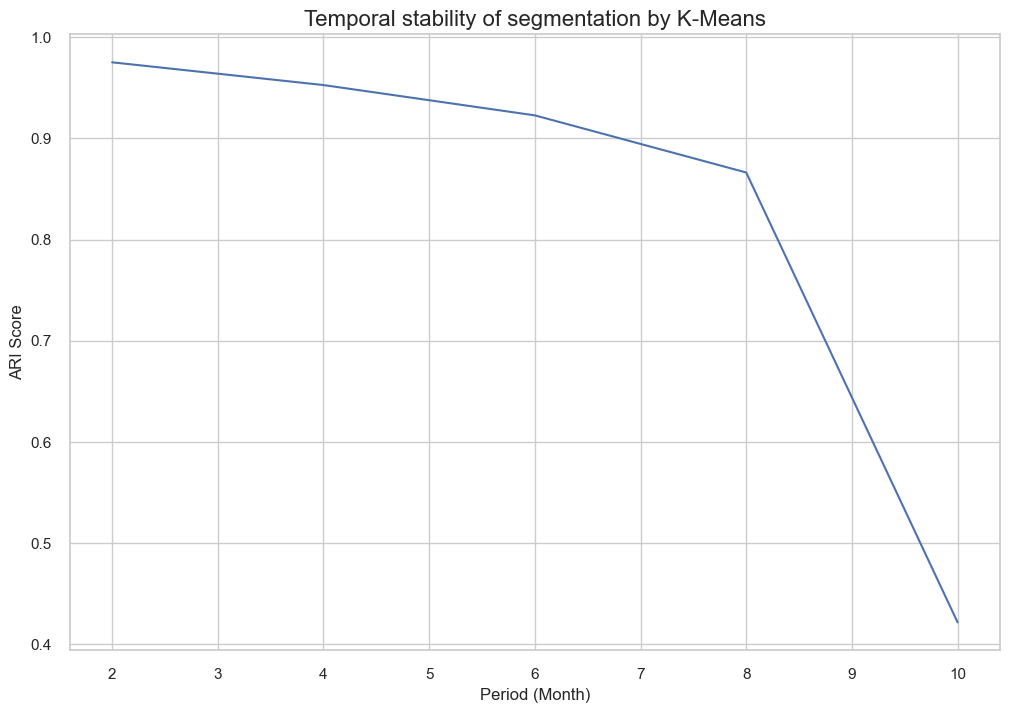

In [114]:
ari_score = pd.DataFrame(ari_score, columns=["period", "ARI"])

# plot ARI Score
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=ari_score, x="period", y="ARI")
plt.xlabel("Period (Month)")
plt.ylabel("ARI Score")
plt.title("Temporal stability of segmentation by K-Means",
          fontsize=16)
plt.show()

The Adjusted Rand Index (ARI) is a measure of similarity that quantifies the agreement between two data clusterings or partitions. It is used to assess the similarity between two sets of labels, such as the true labels and the predicted labels generated by a clustering algorithm.

The ARI returns a value between -1 and 1, where:
- -1 indicates that the two clusterings are completely dissimilar.
- 1 suggests that the two clusterings are identical.
- 0 implies that the clusterings are no better than random chance.

In the context of evaluating clustering algorithms, the ARI is a valuable metric because it considers the agreement beyond chance between clusterings. It helps determine how well a clustering algorithm has grouped data points compared to a ground truth or reference clustering. A higher ARI value indicates a better clustering result, while a lower ARI value suggests poor clustering performance. It is a useful tool for assessing the quality and accuracy of clustering solutions.

In [115]:
jaccard_scores = []

for p in np.arange(2, (time_delta - 12), 2):
    # Create a dataset for the period
    data_period = make_dataset(dpath='./data/source/', initial=False, period=p)
    
    # Filter on initial customer clients
    data_period = data_period[data_period.index.isin(data_init.index)]
    
    # K-Means
    kmeans_p = Pipeline([
        ("preprocessor", StandardScaler()),
        ("kmeans", KMeans(best_k, random_state=42))
    ])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    
    # Calculate the Jaccard Index
    jaccard_p = jaccard_score(init_labels, p_labels, average='micro')
    jaccard_scores.append([p, jaccard_p])

Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_delay 	 8.0
______________________________________________________
Feature engineering execution time: 10.05s
Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_delay 	 8.0
______________________________________________________
Feature engineering execution time: 15.19s
Creation of the dataset in progress...
______________________________________________________
Features completed with the most frequent value:
______________________________________________________
avg_payment_installments 	 1.0
avg_rating 	 5.0
avg_delivery_del

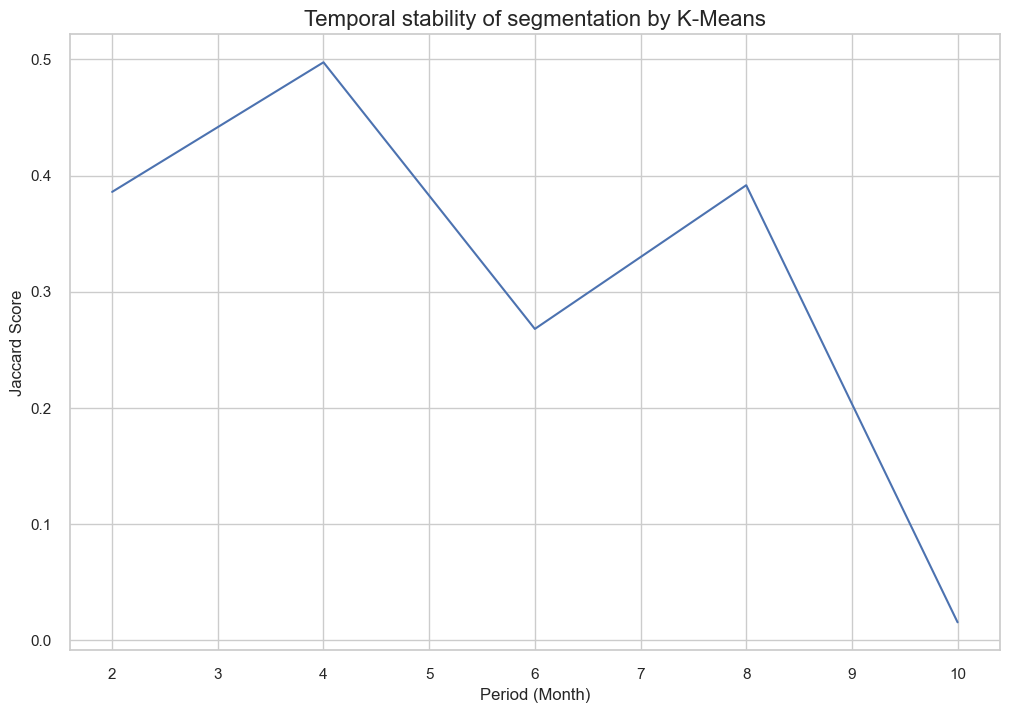

In [116]:
jaccard_scores_df = pd.DataFrame(jaccard_scores, columns=["period", "Jaccard"])

# Plot Jaccard Score
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=jaccard_scores_df, x="period", y="Jaccard")
plt.xlabel("Period (Month)")
plt.ylabel("Jaccard Score")
plt.title("Temporal stability of segmentation by K-Means",
          fontsize=16)
plt.show()

The Jaccard Index, also known as the Jaccard coefficient, is a measure of similarity between two sets. It is commonly used to assess the similarity between two binary data sets, such as feature sets, keyword sets, or sets of items in categories.

The Jaccard Index returns a value between 0 and 1, where:
- 0 indicates a complete absence of similarity between the sets (no common elements).
- 1 indicates a perfect similarity between the sets (the sets are identical).


In the context of data clustering or segmentation, the Jaccard Index can be used to evaluate the similarity between clusters or groups of data. The closer the Jaccard Index is to 1, the more similar the clusters are in terms of their composition of elements. This allows for assessing the stability of clusters over time or during different iterations of clustering models.

By comparing the Adjusted Rand Index (ARI) and the Jaccard coefficient, we observe a decline in their values after a 8-month period. This decline suggests that the stability of the clustering solution decreases over time. To address this, we can recommend implementing a maintenance contract scheduled every 8 months. This periodic maintenance will involve re-evaluating and potentially retraining the clustering model to ensure that it continues to provide reliable and accurate results as the data evolves. Regular maintenance intervals can help sustain the quality of the clustering solution and adapt it to changing patterns and trends in the data.

# Conclusion

For our clustering analysis, we have chosen to employ the K-Means algorithm. This decision is based on several critical factors. Firstly, this approach has demonstrated outstanding performance in terms of clustering quality metrics such as the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Score. These metrics are essential for assessing cluster cohesion, separation, and overall clustering quality.

Additionally, the use of K-Means has proven to be particularly efficient in terms of computational time, which is crucial for our large-scale data analysis. This combination allows us to achieve high-quality clustering results while optimizing computational resources. In summary, our choice to employ K-Means is founded on its ability to provide accurate results, computational efficiency, and a better understanding of our data's structure.

- **Cluster 0 (Satisfied to Reactivate)**: These are customers who placed an order a long time ago for very small amounts and very few items. They paid in one installment. The delivery time was average, with very high shipping costs, and they gave very good ratings.
- **Cluster 1 (Multiple Installments and Satisfied)**: These customers placed an order a long time ago, once, with very few items and average amounts. They are the customers who made the most payments. Their shipping costs were very low, their delivery time was fairly short, and they gave excellent ratings.
- **Cluster 2 (Loyal and Satisfied)**: These are customers who have placed the most frequent orders, quite recently, for relatively high amounts and numerous items. They paid in multiple installments. Their delivery time was fairly short, with rather low shipping costs, and overall, they were very satisfied.
- **Cluster 3 (Occasional VIPs)**: These customers placed an order some time ago for very large amounts and multiple items. They paid in multiple installments. Their delivery time was short, with very low shipping costs, and they gave a fairly high rating.
- **Cluster 4 (Satisfied New Customers)**: These customers have recently placed a single order for small amounts and very few items. They paid in one installment. Their delivery time was very short, with low shipping costs, and they gave a very good rating.
- **Cluster 5 (Longtime Dissatisfied)**: These customers placed an order some time ago for small amounts and very few items. They paid in multiple installments. Their delivery time was very long, with average shipping costs, and they gave very poor ratings.

Possible marketing actions:

**Cluster 0 (Satisfied to Reactivate):**

- Reactivation Discounts: Offer special discounts or promotions to entice these customers to return and make a new purchase. Highlight the benefits of their previous positive experience, such as fast delivery and good ratings.
- Personalized Product Recommendations: Send personalized product recommendations based on their previous purchase history, aiming to re-engage them with items they might be interested in.

**Cluster 1 (Multiple Installments and Satisfied):**

- Loyalty Rewards: Create a loyalty program that rewards these customers for their frequent payments. Offer discounts, exclusive offers, or early access to sales to encourage them to make more purchases.
- Referral Incentives: Encourage these customers to refer friends or family by offering referral incentives. Reward them when their referrals make a purchase, thereby expanding your customer base.

**Cluster 2 (Loyal and Satisfied):**

- Exclusive VIP Offers: Recognize their loyalty by providing exclusive VIP offers and early access to new products or collections. Make them feel valued and appreciated for their continued support.
- Subscription Services: Introduce subscription services that allow them to receive products regularly without the need to reorder. Offer them convenience and a sense of priority.

**Cluster 3 (Occasional VIPs):**

- VIP Upgrade: Offer an upgrade to a premium or VIP membership, providing additional perks such as faster delivery, special discounts, and priority customer support.
- Limited-Time Offers: Create limited-time offers for high-value items, targeting this cluster with exclusive deals that align with their previous purchase behavior.

**Cluster 4 (Satisfied New Customers):**

- Welcome Back Discount: Offer a "Welcome Back" discount for their second purchase to encourage repeat business. Highlight the positive aspects of their previous experience.
- Product Bundles: Promote product bundles or packages that align with their initial purchase, providing them with value and convenience.

**Cluster 5 (Longtime Dissatisfied):**

- Recovery Campaign: Launch a targeted recovery campaign with personalized offers, aiming to win back dissatisfied customers. Address their previous concerns and emphasize improvements in delivery and service.
- Customer Feedback Surveys: Send surveys to gather detailed feedback from this cluster to identify specific pain points and areas for improvement. Use their input to enhance the overall customer experience.

Finally, we recommend implementing a maintenance contract every 8 months. This periodic maintenance will ensure the continued stability and accuracy of the clustering model, adapting it to the evolving data landscape and providing valuable insights for Olist.